In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../..')

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import adjusted_rand_score

In [3]:
from pygraphs.measure import *
from pygraphs.cluster import *
from pygraphs.graphs import StochasticBlockModel
from pygraphs.scenario import ParallelByGraphs
from pygraphs.measure import logComm_K

In [4]:
graphs, info = StochasticBlockModel(100, 2, p_in=0.3, p_out=0.2).generate_graphs(100)

In [5]:
results = {}

In [ ]:
exp = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 31), progressbar=True, verbose=True)

for alg in [
#     KKMeans,
#     KKMeans_vanilla,
#     SpectralClustering_rubanov,
#     KMeans_sklearn,
#     KKMeans_kernlab,
    SpectralClustering_kernlab
]:
    print(alg.name)
    results[alg.name] = exp.perform(alg, logComm_K, graphs, 2, n_jobs=1)
    with open(alg.name + '.pkl', 'wb') as f:
        pickle.dump(results[alg.name], f)

SpectralClustering_kernlab


ERROR:root:logComm K, 0.00, graph 0: [Errno 2] No such file or directory: '99aab5c8-9778-4745-be47-1bbf3f168acf.csv_result.csv'
ERROR:root:logComm K, 0.02, graph 0: [Errno 2] No such file or directory: 'b8a1a674-15a1-458b-97e2-2a5d349c2a38.csv_result.csv'
ERROR:root:logComm K, 0.04, graph 0: [Errno 2] No such file or directory: '89c88065-8b04-47fa-a387-6c74b44c5853.csv_result.csv'
ERROR:root:logComm K, 0.06, graph 0: [Errno 2] No such file or directory: '488e7b21-80f7-47ad-acde-eea45efbaa3b.csv_result.csv'
ERROR:root:logComm K, 0.08, graph 0: [Errno 2] No such file or directory: '4ee14040-23a5-4ec5-80a2-38a756373ac4.csv_result.csv'
ERROR:root:logComm K, 0.10, graph 0: [Errno 2] No such file or directory: 'ae1004e9-2756-4923-91ca-d679e680cfad.csv_result.csv'
ERROR:root:logComm K, 0.12, graph 0: [Errno 2] No such file or directory: '14e37a51-a5b0-48d1-98db-9c969e024f38.csv_result.csv'
ERROR:root:logComm K, 0.15, graph 0: [Errno 2] No such file or directory: 'c6b23170-921d-4120-a08a-11f29

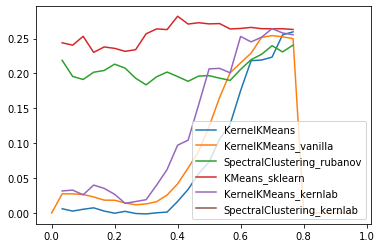

In [8]:
for result_name, result_value in results.items():
    plt.plot(result_value[0], result_value[1], label=result_name)
plt.legend()